In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
%matplotlib inline
from sklearn.preprocessing import StandardScaler 

In [2]:
wbcd=pd.read_csv("C:\\Users\\sonih\\Downloads\\wbcd_new.csv")
wbcd.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,B,0.252686,0.090632,0.242278,0.135992,0.452920,0.154684,0.093416,0.183897,0.454040,...,0.198150,0.096482,0.182081,0.089437,0.444628,0.096351,0.099201,0.322715,0.248768,0.083104
1,B,0.171281,0.312479,0.176145,0.086066,0.399476,0.292375,0.149649,0.131312,0.435354,...,0.140519,0.291045,0.138802,0.058887,0.331044,0.217530,0.153035,0.272371,0.271043,0.136626
2,B,0.192106,0.240785,0.187478,0.097434,0.497156,0.179928,0.071368,0.123260,0.330303,...,0.159374,0.384328,0.147019,0.070340,0.434062,0.117307,0.085224,0.255361,0.282476,0.155910
3,B,0.203464,0.124450,0.201852,0.102354,0.575697,0.289001,0.108599,0.238370,0.359091,...,0.141942,0.099947,0.130086,0.061148,0.432741,0.150294,0.069241,0.295911,0.105855,0.083956
4,B,0.388518,0.118363,0.372193,0.241060,0.243748,0.153242,0.079499,0.132058,0.333838,...,0.294201,0.098881,0.269386,0.155795,0.273592,0.142048,0.108786,0.281031,0.181747,0.082776


In [3]:
scale=StandardScaler()

In [4]:
scale.fit(wbcd.iloc[:,1:])
wbcd.iloc[:,1:]=scale.transform(wbcd.iloc[:,1:])
wbcd.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,B,-0.513297,-1.605595,-0.540376,-0.542624,0.458285,-0.654413,-0.614306,-0.307442,0.538081,...,-0.573451,-1.634499,-0.604391,-0.582718,0.268776,-0.812128,-0.709978,-0.315133,-0.119321,-0.899721
1,B,-1.001801,-0.079038,-0.934566,-0.877375,0.036986,0.196319,-0.312987,-0.580343,0.402996,...,-0.908925,-0.445740,-0.863230,-0.801227,-0.485202,-0.017590,-0.386625,-0.538203,0.063489,-0.447528
2,B,-0.876835,-0.572377,-0.867014,-0.801153,0.806996,-0.498443,-0.732448,-0.622129,-0.356400,...,-0.799171,0.124213,-0.814083,-0.719308,0.198638,-0.674722,-0.793935,-0.613574,0.157320,-0.284606
3,B,-0.808671,-1.372888,-0.781338,-0.768161,1.426135,0.175472,-0.532950,-0.024740,-0.148296,...,-0.900641,-1.613330,-0.915355,-0.785054,0.189871,-0.458434,-0.889933,-0.433901,-1.292212,-0.892517
4,B,0.301824,-1.414775,0.234000,0.161860,-1.190618,-0.663320,-0.688883,-0.576473,-0.330843,...,-0.014328,-1.619844,-0.082245,-0.108082,-0.866574,-0.512506,-0.652408,-0.499832,-0.669366,-0.902492


In [5]:
X=wbcd.iloc[:,1:]
y=wbcd.iloc[:,:1]

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=False)

In [8]:
from sklearn.neighbors import KNeighborsClassifier

In [9]:
knn=KNeighborsClassifier(n_neighbors=1)

In [10]:
knn.fit(X_train,y_train)

C:\Users\sonih\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [11]:
y_pred=knn.predict(X_test)

In [12]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [13]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           B       0.96      0.96      0.96       113\n           M       0.92      0.93      0.92        58\n\n    accuracy                           0.95       171\n   macro avg       0.94      0.94      0.94       171\nweighted avg       0.95      0.95      0.95       171\n'

In [14]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[108,   5],
       [  4,  54]], dtype=int64)

In [15]:
accuracy_score(y_test,y_pred)

0.9473684210526315

In [23]:
y_test=np.array(y_test)

In [24]:
y_test.reshape(171)

array(['M', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'M', 'B', 'B',
       'M', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B',
       'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'B',
       'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M',
       'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B',
       'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'M',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'B',
       'B', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'B',
       'M', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'M', 'M', 'B',
       'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B',
       'B', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B',
       'M', 'B'], dtype=object)

In [25]:
error=[]
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i=knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

C:\Users\sonih\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.
C:\Users\sonih\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.
C:\Users\sonih\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.
C:\Users\sonih\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example

C:\Users\sonih\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.
C:\Users\sonih\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


Text(0, 0.5, 'error rate')

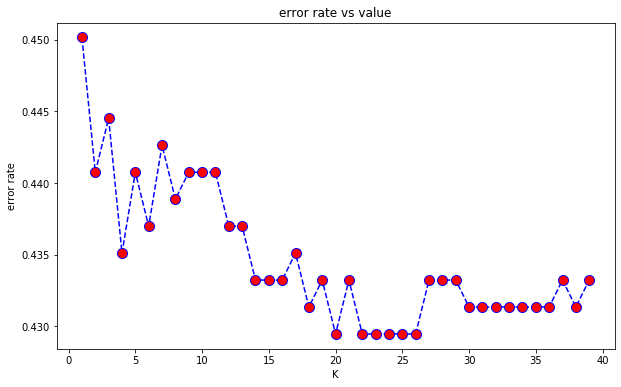

In [26]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('error rate vs value')
plt.xlabel('K')
plt.ylabel('error rate')

In [27]:
knn=KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train,y_train)
y_p=knn.predict(X_test)

C:\Users\sonih\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


In [29]:
accuracy_score(y_test,y_p)

0.9415204678362573